In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
filename = "NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_Jul2021.root"
tree = Tree(filename)
preselection = Selection(tree,cuts={"njetcut":6,"etacut":None},tag="preselection")
sixb_in_preselection = preselection.nsixb_selected == 6
print(preselection)
baseline = Selection(tree,cuts={},mask=sixb_in_preselection,variable="jet_btag",include=preselection,tag="baseline")
print(baseline)

--- all preselection ---
Event Efficiency:      0.834
Event Selected Purity: 0.288
--- all baseline / btag ---
Event Efficiency:      0.288
Event Selected Purity: 0.886


In [3]:
baseline_6jets = Selection(tree,cuts={},njets=6,variable="jet_btag",include=baseline,tag="baseline")
print(baseline_6jets)

--- 6 baseline / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.622


In [5]:
ptcuts = range(20,150,20)
first_ptselections = [
    Selection(tree,cuts={"ptcut":ptcut,"njetcut":1},variable="jet_btag",njets=1,include=baseline,tag=f"jet{ptcut}pt")
    for ptcut in ptcuts
]

In [6]:
first_jet60pt = next(selection for selection in first_ptselections if selection.tag == "jet60pt")
first_jet80pt = next(selection for selection in first_ptselections if selection.tag == "jet80pt")

In [7]:
second_ptselections = [
    Selection(tree,cuts={"ptcut":ptcut,"njetcut":1},variable="jet_btag",njets=1,previous=first_jet80pt,include=baseline,tag=f"jet{ptcut}pt")
    for ptcut in ptcuts
]

In [8]:
second_jet60pt = next(selection for selection in second_ptselections if selection.tag == "jet60pt")

In [9]:
third_ptselections = [
    Selection(tree,cuts={"ptcut":ptcut,"njetcut":1},variable="jet_btag",njets=1,previous=second_jet60pt,include=baseline,tag=f"jet{ptcut}pt")
    for ptcut in ptcuts
]

In [10]:
third_jet40pt = next(selection for selection in third_ptselections if selection.tag == "jet40pt")

In [11]:
fourth_ptselections = [
    Selection(tree,cuts={"ptcut":ptcut,"njetcut":1},variable="jet_btag",njets=1,previous=third_jet40pt,include=baseline,tag=f"jet{ptcut}pt")
    for ptcut in ptcuts
]

In [12]:
last_jet20pt = Selection(tree,variable="jet_btag",njets=3,previous=third_jet40pt,include=baseline,tag="jet20pt")

In [13]:
print(last_jet20pt.merge())

--- 1 jet80pt / btag | 1 jet60pt / btag | 1 jet40pt / btag | 3 jet20pt / btag merged ---
Event Efficiency:      0.992
Event Selected Purity: 0.626


Best Purity:
--- 1 jet80pt / btag ---
Event Efficiency:      0.995
Event Selected Purity: 0.993
Best Efficiency:
--- 1 jet20pt / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.988


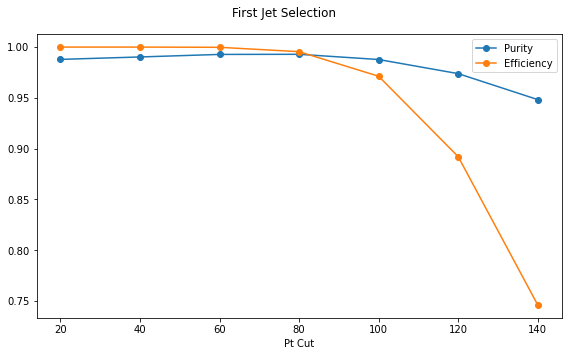

In [15]:
compare_selections(first_ptselections,ptcuts,title="First Jet Selection",saveas="first_selection")

Best Purity:
--- 1 jet80pt / btag | 1 jet60pt / btag ---
Event Efficiency:      0.998
Event Selected Purity: 0.987
Best Efficiency:
--- 1 jet80pt / btag | 1 jet20pt / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.982


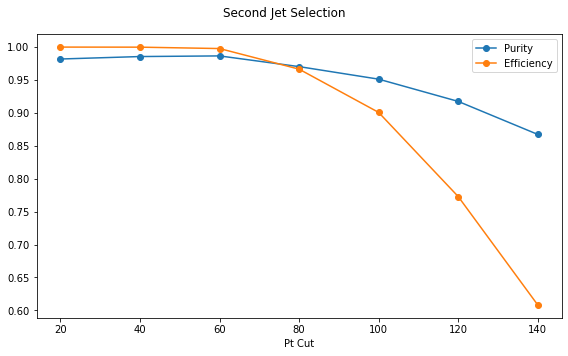

In [16]:
compare_selections(second_ptselections,ptcuts,title="Second Jet Selection",saveas="second_selection")

Best Purity:
--- 1 jet80pt / btag | 1 jet60pt / btag | 1 jet40pt / btag ---
Event Efficiency:      0.999
Event Selected Purity: 0.978
Best Efficiency:
--- 1 jet80pt / btag | 1 jet60pt / btag | 1 jet20pt / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.974


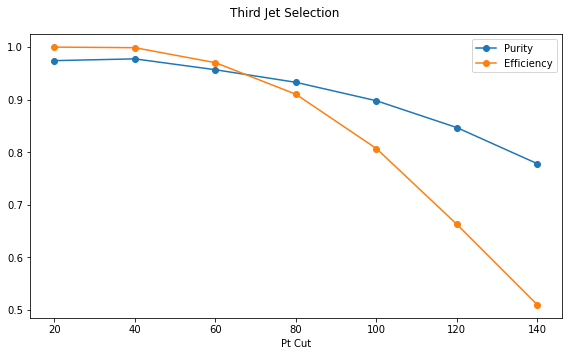

In [17]:
compare_selections(third_ptselections,ptcuts,title="Third Jet Selection",saveas="third_selection")

Best Purity:
--- 1 jet80pt / btag | 1 jet60pt / btag | 1 jet40pt / btag | 1 jet20pt / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.962
Best Efficiency:
--- 1 jet80pt / btag | 1 jet60pt / btag | 1 jet40pt / btag | 1 jet20pt / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.962


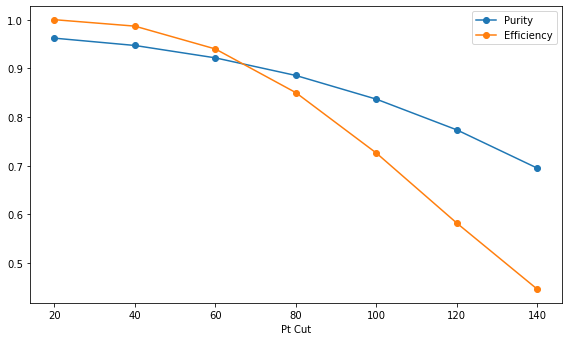

In [18]:
compare_selections(fourth_ptselections,ptcuts,saveas="fourth_selection")

In [19]:
print(third_jet40pt.merge())

--- 1 jet80pt / btag | 1 jet60pt / btag | 1 jet40pt / btag merged ---
Event Efficiency:      0.992
Event Selected Purity: 0.958


In [20]:
top_3jet40pt = Selection(tree,cuts={"ptcut":40,"njetcut":3},njets=3,variable="jet_btag",include=baseline,tag="jet40pt")
print(top_3jet40pt)

--- 3 jet40pt / btag ---
Event Efficiency:      0.998
Event Selected Purity: 0.959


In [21]:
top_3jet20pt = Selection(tree,cuts={"njetcut":3},njets=3,variable="jet_btag",include=baseline,tag="jet20pt")
print(top_3jet20pt)

--- 3 jet20pt / btag ---
Event Efficiency:      1.0
Event Selected Purity: 0.952
